# Data Understanding

In [ ]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.5 MB/s eta 0:00:00


 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          55.4         65.2           5.1          3.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa           3.6          1.5           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           6.5          1.3
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           4.7          3.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2          33.8         45.4
 13     Iris-setosa           1.4     

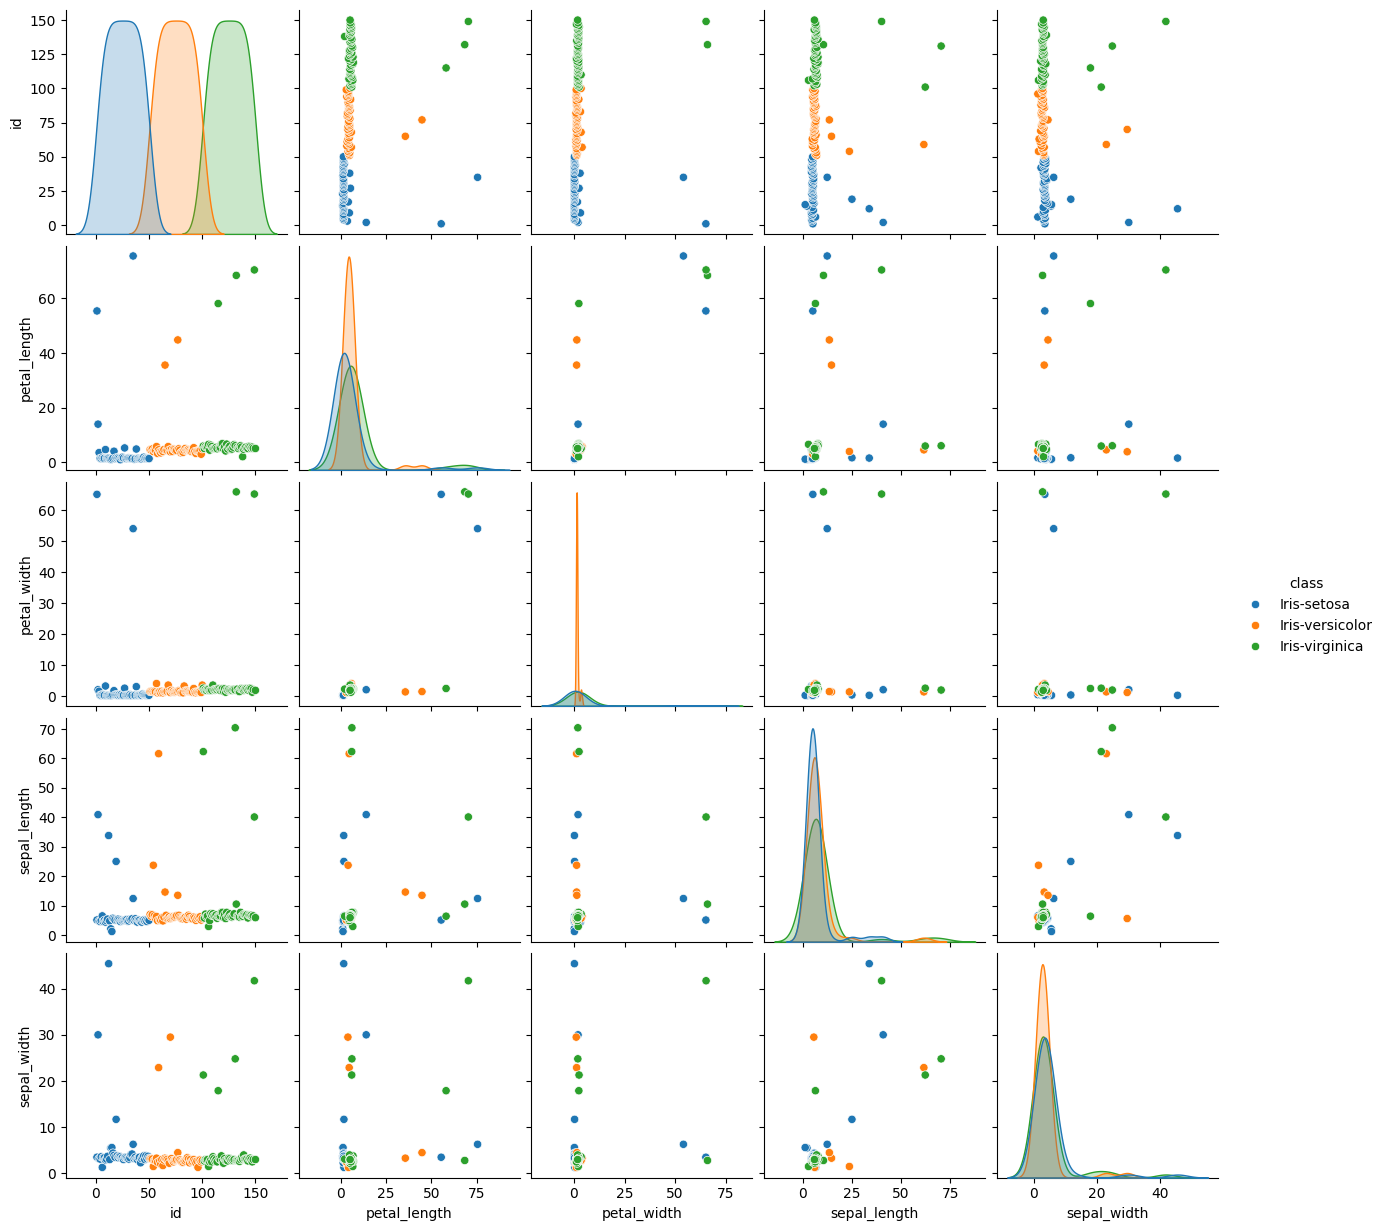

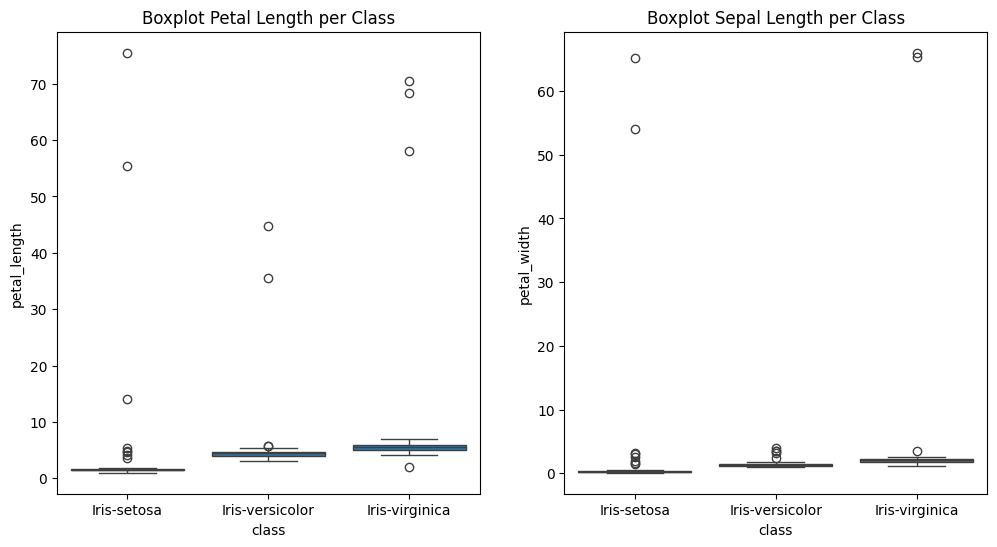

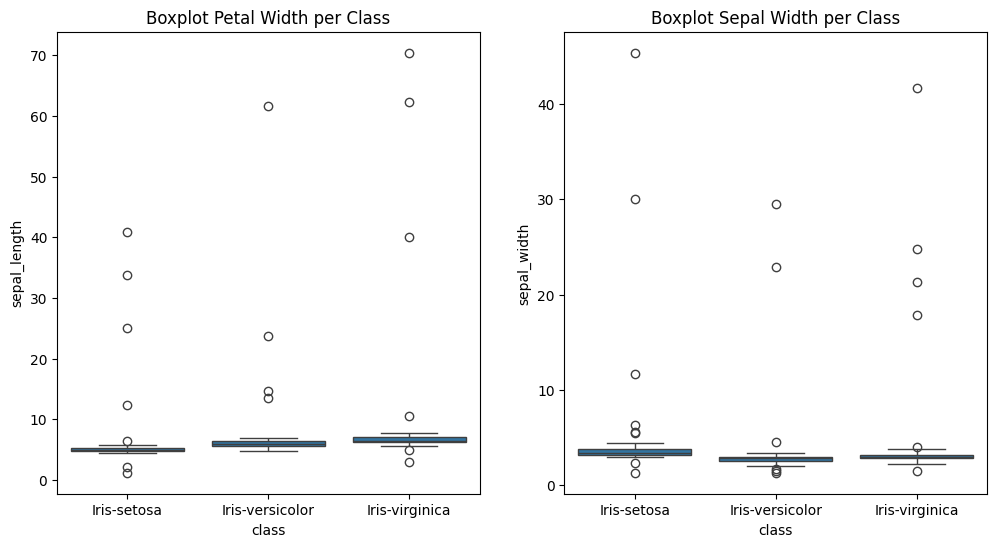

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-pendata-ahmadsyauqifuady33-3378.c.aivencloud.com",
        user="avnadmin",
        password="AVNS_6qwFNwK5B4vuVyZEVWE",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM mad")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-1b41a3bb-ahmadsyauqifuady33-3378.f.aivencloud.com",
        user="avnadmin",
        password="AVNS_-Cfznxfa1-nPQJ9qmWT",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM ayam")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

# Visualisasi data
# Scatter plot antar variabel
sns.pairplot(df_merged, hue="class")
plt.show()

# Visualisasi data dengan boxplot per class
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="class", y=df_merged.iloc[:, 2], data=df_merged)
plt.title("Boxplot Petal Length per Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="class", y=df_merged.iloc[:, 3], data=df_merged)
plt.title("Boxplot Sepal Length per Class")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="class", y=df_merged.iloc[:, 4], data=df_merged)
plt.title("Boxplot Petal Width per Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="class", y=df_merged.iloc[:, 5], data=df_merged)
plt.title("Boxplot Sepal Width per Class")

plt.show()